# Using NLTSA functions from the `jmspack` package

## Showing the usage of the following NLTSA functions

- fluctuation_intensity(): run fluctuation intensity on a time series to detect non linear change
- distribution_uniformity(): run distribution uniformity on a time series to detect non linear change
- complexity_resonance(): the product of fluctuation_intensity and distribution_uniformity
- complexity_resonance_diagram(): plots a heatmap of the complexity_resonance
- ts_levels(): defines distinct levels in a time series based on decision tree regressor
- cumulative_complexity_peaks(): a function which will calculate the significant peaks in the dynamic
  complexity of a set of time series (these peaks are known as cumulative complexity peaks; CCPs)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from jmspack.NLTSA import (ts_levels, 
                           distribution_uniformity, 
                           fluctuation_intensity, 
                           complexity_resonance, 
                           complexity_resonance_diagram,
                          cumulative_complexity_peaks)

import jmspack

In [2]:
print(f"The current version of 'jmspack' used in this notebook is: {jmspack.__version__}")

The current version of 'jmspack' used in this notebook is: 0.0.1


## Read in the time series dataset

In [3]:
ts_df = pd.read_csv("../datasets/time_series_dataset.csv", index_col=0)
ts_df.head()

,lorenz,rossler,henon,Experimental_data_periodic,Experimental_data_quasi-periodic-2,Experimental_data_quasi-periodic-3,Experimental_data_chaotic
0,-0.156058,0.170777,-1.443430,3.00425,2.78453,3.62505,3.38143
1,-0.071057,-0.428226,-0.173122,2.97957,2.79728,3.71557,3.40631
2,0.004560,-1.014346,0.937000,2.95782,2.81526,3.81517,3.44081
3,0.072342,-1.592594,0.470093,2.94161,2.83334,3.88885,3.47883
4,0.133683,-2.161230,1.460110,2.92549,2.85939,3.95306,3.50761


In [4]:
ts = ts_df["lorenz"]

## Calculate and plot the time series levels

In [5]:
ts_levels_df = ts_levels(ts, ts_x=None, criterion="mse", max_depth=10, min_samples_leaf=1,
                         min_samples_split=2, max_leaf_nodes=30, plot=False, equal_spaced=True, n_x_ticks=10)

In [6]:
ts_levels_melt = ts_levels_df.melt(id_vars="t_steps")
ts_levels_melt.head(2)

,t_steps,variable,value
0,0,original_ts,-0.156058
1,1,original_ts,-0.071057


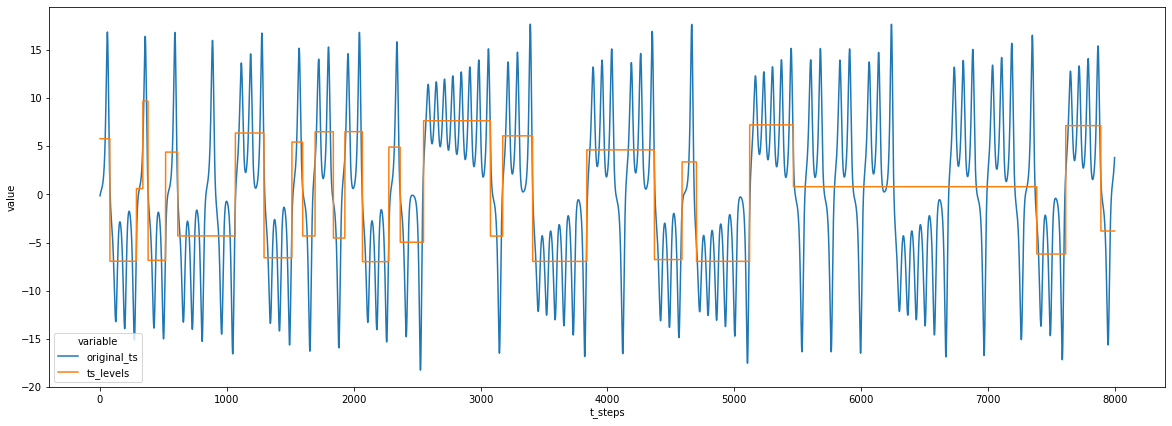

In [7]:
_ = plt.figure(figsize=(20,7))
_ = sns.lineplot(x="t_steps", y="value", hue="variable", data=ts_levels_melt)

## Scale and calculate and plot the distribution uniformity of the time series dataset

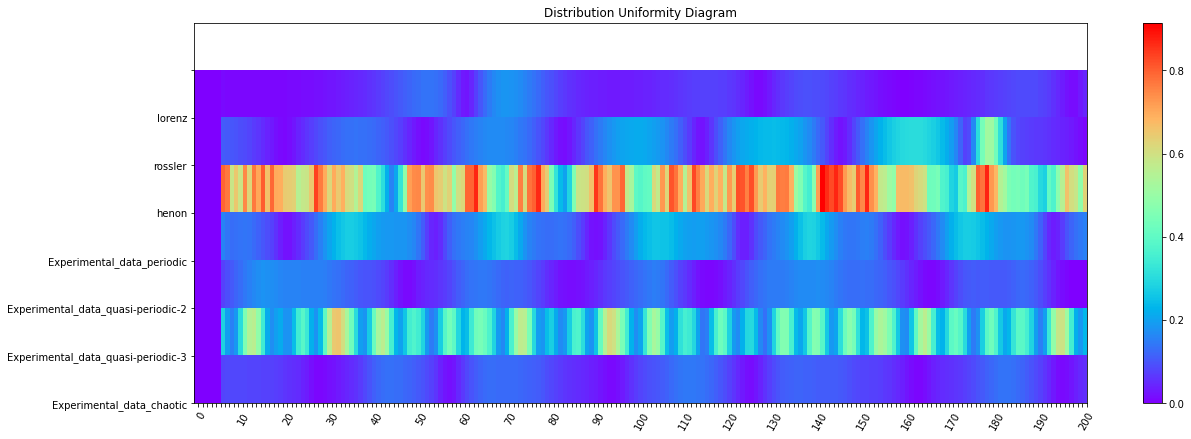

In [8]:
scaler = MinMaxScaler()

scaled_ts_df = pd.DataFrame(scaler.fit_transform(ts_df), columns=ts_df.columns.tolist()).loc[0:200, :]

distribution_uniformity_df = pd.DataFrame(distribution_uniformity(scaled_ts_df, win=7, xmin=0, xmax=1, col_first=1, col_last=7))
distribution_uniformity_df.columns=scaled_ts_df.columns.tolist()

_ = complexity_resonance_diagram(distribution_uniformity_df,
                                plot_title='Distribution Uniformity Diagram')

## Calculate and plot the fluctuation intensity of the time series dataset

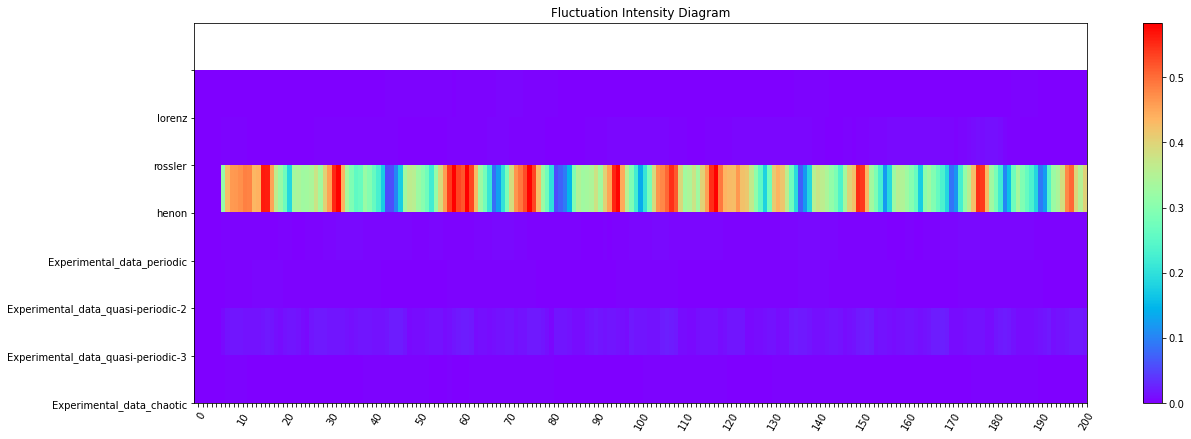

In [9]:
fluctuation_intensity_df = pd.DataFrame(fluctuation_intensity(scaled_ts_df, win=7, xmin=0, xmax=1, col_first=1, col_last=7))
fluctuation_intensity_df.columns=scaled_ts_df.columns.tolist()

_ = complexity_resonance_diagram(fluctuation_intensity_df,
                                plot_title='Fluctuation Intensity Diagram')

## Calculate and plot the complexity resonance of the time series dataset

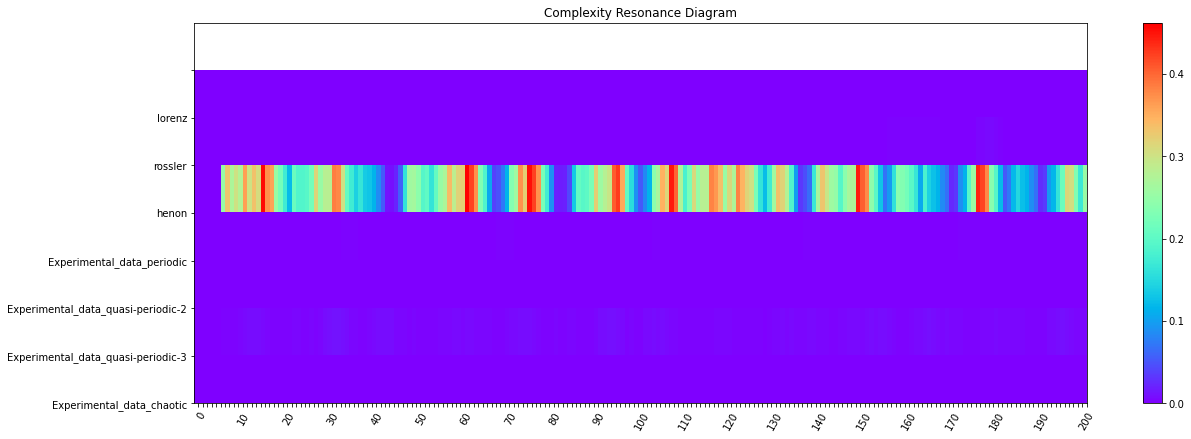

In [10]:
complexity_resonance_df = complexity_resonance(distribution_uniformity_df, fluctuation_intensity_df)

_ = complexity_resonance_diagram(complexity_resonance_df)

## Calculate and plot the cumulative complexity peaks of the time series dataset

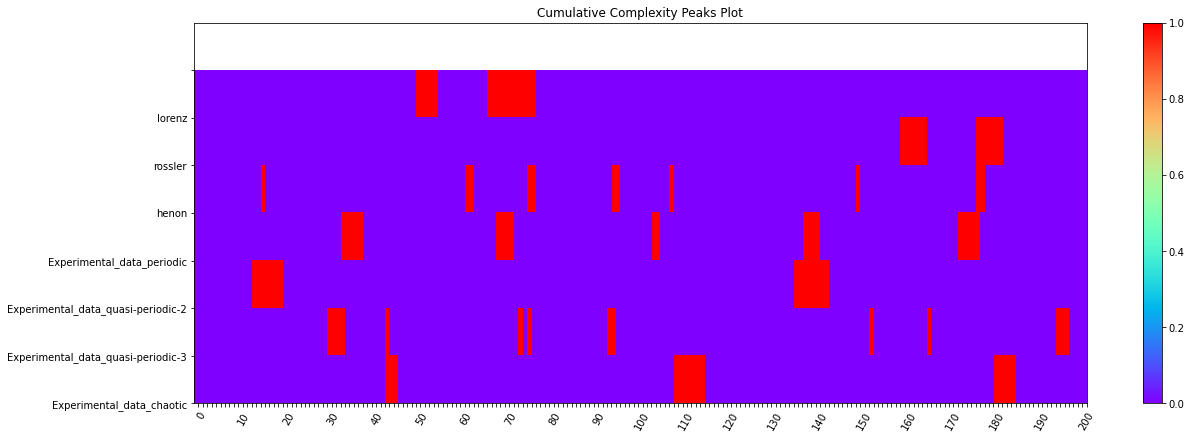

In [11]:
cumulative_complexity_peaks_df, significant_peaks_df = cumulative_complexity_peaks(df=complexity_resonance_df)

_ = complexity_resonance_diagram(cumulative_complexity_peaks_df, 
                                 plot_title='Cumulative Complexity Peaks Plot')

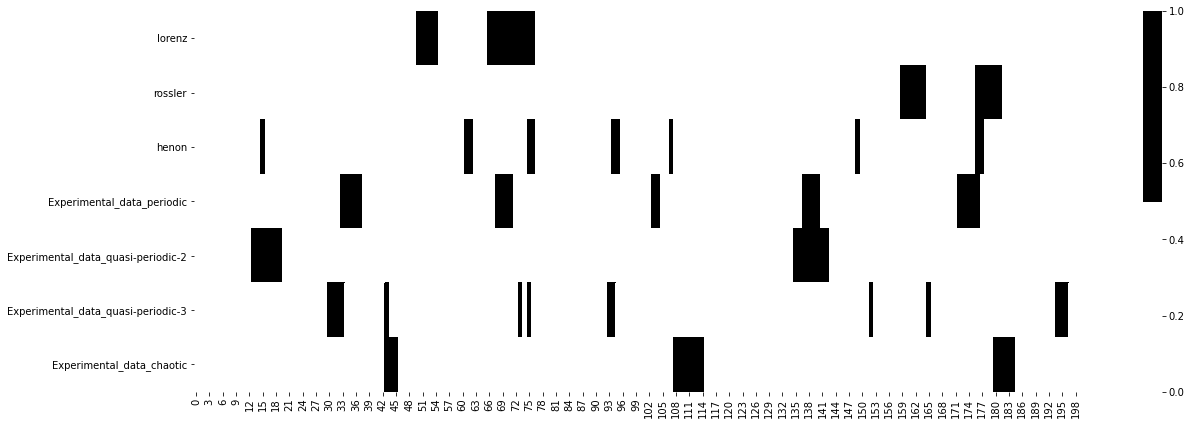

In [12]:
_ = plt.figure(figsize=(20,7))
# custom_cmap = sns.cubehelix_palette(start=0, rot=-1, as_cmap=True)
custom_cmap = sns.color_palette(["#FFFFFF", "#000000"])
_ = sns.heatmap(cumulative_complexity_peaks_df.T, cmap=custom_cmap)

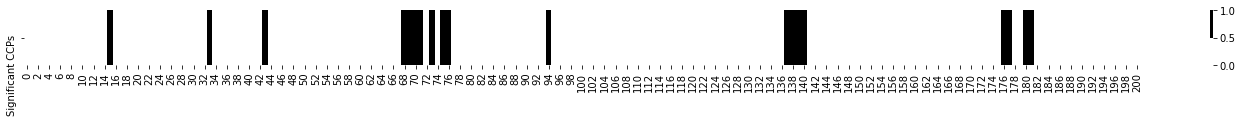

In [13]:
_ = plt.figure(figsize=(25,1))
_ = sns.heatmap(significant_peaks_df.T, cmap=custom_cmap)